In [1]:
# Importing necessary libraries and installing openpyxl engine for the newer excel files.
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt  
!pip install openpyxl

In [2]:
data = pd.read_excel("Frequency of Purchase Analysis Data Question.xlsx", engine = "openpyxl")

In [3]:
#To select the columns needed and ignore the columns with questions in the original excel file
columns = list(data.columns.values)
columns = columns[0:4]
columns

['Outlet ID', 'Brand Name', 'Sales Value', 'DATE']

In [4]:
#New dataframe with relevant columns
df = data[columns]
df.head()

,Outlet ID,Brand Name,Sales Value,DATE
0,Outlet 1,Brand 1,395.6906,2018-04-10
1,Outlet 1,Brand 1,395.6906,2018-04-24
2,Outlet 1,Brand 2,724.9328,2018-04-10
3,Outlet 1,Brand 3,150.0466,2018-04-10
4,Outlet 1,Brand 3,300.0932,2018-04-24


In [5]:
outlets_count = df['Outlet ID'].value_counts()
count_results = {}
total_sales_value = {}
sales_value_per_outlet = {}
for i in range(1,10): 
    count = outlets_count.where(outlets_count==i).dropna()
    count_results[i]= count.size
    outlet_ids = count.index.tolist()
    count_df = df[df['Outlet ID'].isin(outlet_ids)]
    total_sales_value[i] = round(count_df["Sales Value"].sum(),2)    
    sales_value_per_outlet[i] = round(total_sales_value[i]/count_results[i],2)

In [6]:
print("Count of outlet ids with their respective values of frequency counts are as follows:\n",count_results)

Count of outlet ids with their respective values of frequency counts are as follows:
 {1: 818, 2: 717, 3: 1210, 4: 744, 5: 489, 6: 468, 7: 344, 8: 235, 9: 786}


In [7]:
print("The total sales values of frequency counts are as follows:\n",total_sales_value) 

The total sales values of frequency counts are as follows:
 {1: 810816.79, 2: 927453.88, 3: 3478156.77, 4: 2955618.1, 5: 2305511.46, 6: 3085520.76, 7: 2464056.55, 8: 1989404.76, 9: 8318668.86}


In [8]:
print("Average Sales Value per Outlet:", sales_value_per_outlet)

Average Sales Value per Outlet: {1: 991.22, 2: 1293.52, 3: 2874.51, 4: 3972.6, 5: 4714.75, 6: 6592.99, 7: 7162.96, 8: 8465.55, 9: 10583.55}


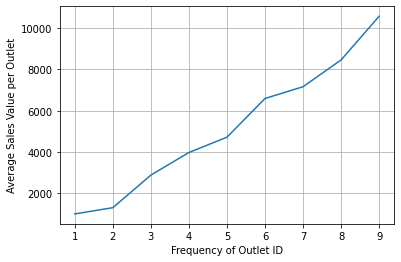

In [9]:
x = range(1,10)
y = list(sales_value_per_outlet.values())
plt.plot(x, y)  
plt.xlabel('Frequency of Outlet ID')
plt.ylabel('Average Sales Value per Outlet')
plt.grid()
plt.show()